In [1]:
from scipy.stats import moment
from scipy.stats import kurtosis, skew, scoreatpercentile
from scipy.stats import norm, lognorm, beta
from scipy.optimize import minimize

from numpy import zeros, fromiter, savetxt
from IPython.display import Image

import subprocess

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import auxiliar_matcomp as aux

#%matplotlib inline

size = 2**12
t = fromiter((i for i in range(0,size)), int, size)

# <center>Equação Logística com $\rho=3.75$ e $A_0=0.0001$</center>

* [Série Completa](#sc)
* [Primeiros 1024  pontos](#first)
* [Últimos 1024 pontos](#last)

<a id='sc'></a>
## <center>Série Completa</center>
* [Geração e plot](#genplot)
* [Cálculo dos momentos estatísticos](#calcstats)
* [Distribuição Normal fitada](#fitnormdist)
* [Distribuição Lognormal fitada](#fitlognormdist)
* [Plot do espaço de Cullen-Frey](#cullenfrey)
* [Fitting da melhor distribuição segundo método de Cullen-Frey](#fitbestdist)
* [Plot da função de autocorrelação](#autocorre)
* [Plot do PSD e DFS](#psddfa)

<a id='genplot'></a>
### <center>Gerando série temporal e plotando resultado</center>

In [2]:
name = "A.ex:1.1.a"

rho = 3.75

A = zeros(size)
A[0] = 0.0001

for i in range(0, size-1):
    A[i+1] = rho*A[i]*(1-A[i])
    
savetxt(name + ".txt", A)

save_A = A

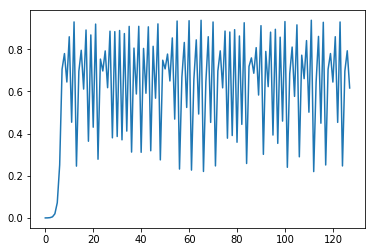

In [3]:
num_points = 128
plt.plot(t[0:num_points], A[0:num_points])
plt.show()

<a id='calcstats'></a>
### <center>Calculando os momentos do ensemble</center>

In [4]:
A_mean, A_var, A_skew, A_kurtosis = aux.calcMoments(A)

print("mean : ", A_mean)
print("var  : ", A_var)
print("skew : ", A_skew)
print("kurt : ", A_kurtosis)

A_Q1 = scoreatpercentile(A, 25)
A_Q3 = scoreatpercentile(A, 75)

print("Q1   : ", A_Q1)
print("Q3   : ", A_Q3)

mean :  0.649942118587
var  :  0.0541387057068
skew :  -0.532938610347
kurt :  -0.975894876415
Q1   :  0.461804766442
Q3   :  0.85520603739


<a id='fitnormdis'></a>
### <center>Fitando uma distribuição normal</center>

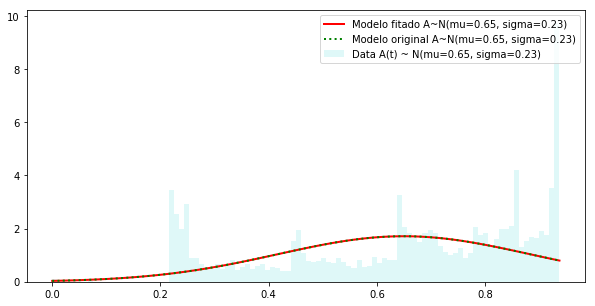

In [5]:
aux.fitting_normal_distribution(A)

<a id='fitlognormdist'></a>
### <center>Fitando uma distribuição lognormal</center>

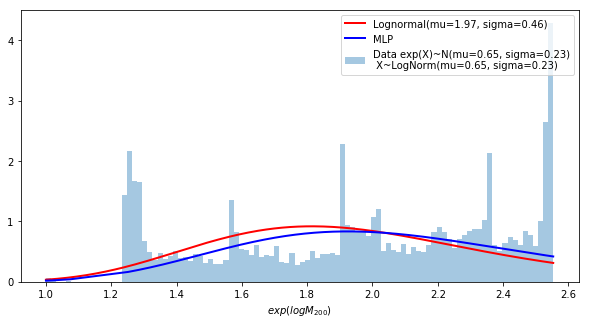

In [6]:
aux.fitting_lognormal_and_mlp_distribution(A)

### Fitando uma distribuição lognormal (utlizando minha implementação)

parametros de fitting:  (0.0028987501553373787, -79.35504533233734, 80.005368368211975)
        Fitado			 Original
mean :  0.6506591692338048 	 0.649942118587
var  :  0.053785511372061605 	 0.0541387057068
skew :  0.008696293091770939 	 -0.5329386103474337
kurt :  0.0001344456633658453 	 -0.9758948764152438


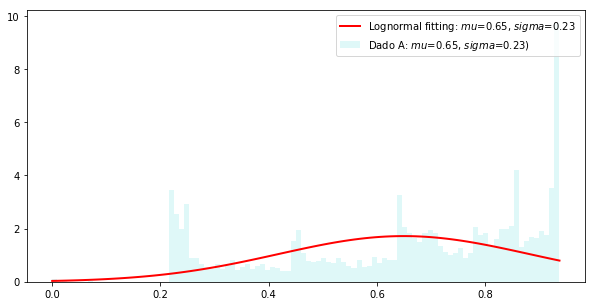

In [7]:
aux.fitting_lognormal_distribution(A)

<a id='cullenfrey'></a>
### <center>Plotando dados no espaço de Cullen-Frey</center>

summary statistics
------
min:  1e-04   max:  0.9375 
median:  0.6949414 
mean:  0.6499421 
estimated sd:  0.2327057 
estimated skewness:  -0.5331339 
estimated kurtosis:  2.024379 



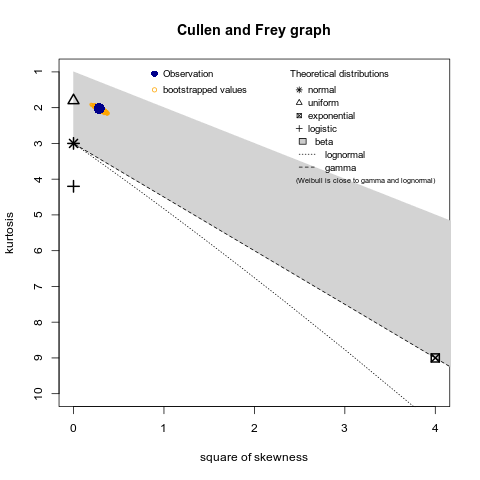

In [8]:
command = 'Rscript'
path_script = 'cullen_frey_script.R'

# define arguments
args = [name,]

# build subprocess command
cmd = [command, path_script] + args

x = subprocess.check_output(cmd, universal_newlines=True)
print(x)

Image(name+".png")

<a id='fitbestdis'></a>
### <center>Fitando melhor distribuição segundo método de Cullen-Frey</center>

parametros de fitting:  (1.5958709801722486, 0.66841430113382549, 0.0, 0.93759999414477568)
        Fitado			 Original
mean :  0.6608215996538368 	 0.649942118587
var  :  0.056030991667475306 	 0.0541387057068
skew :  -0.7609387058229865 	 -0.5329386103474337
kurt :  -0.4362018469271502 	 -0.9758948764152438


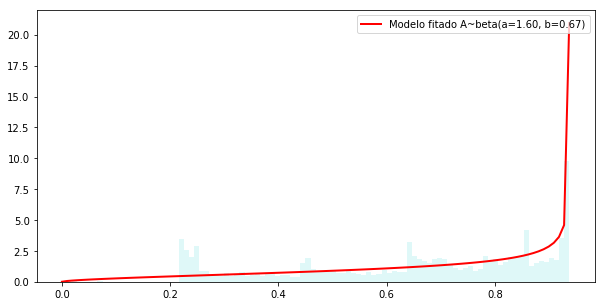

In [9]:
aux.fitting_beta_distribution(A)

<a id='autocorre'></a>
### <center>Calculando autocorrelação</center>

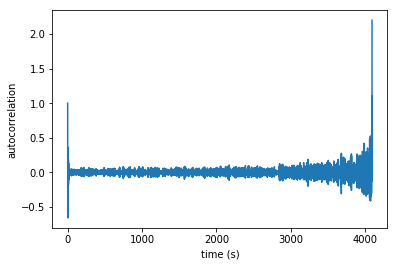

In [10]:
aux.plot_estimated_autocorrelation(t, A, 0, len(A))

<a id='psddfa'></a>
### <center>Plotando DFA e PSD</center>

Original time series data (4096 points): 

First 10 points: [  1.00000000e-04   3.74962500e-04   1.40558214e-03   5.26352428e-03
   1.96343235e-02   7.21830631e-02   2.51147507e-01   7.05271637e-01
   7.79488331e-01   6.44573524e-01]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


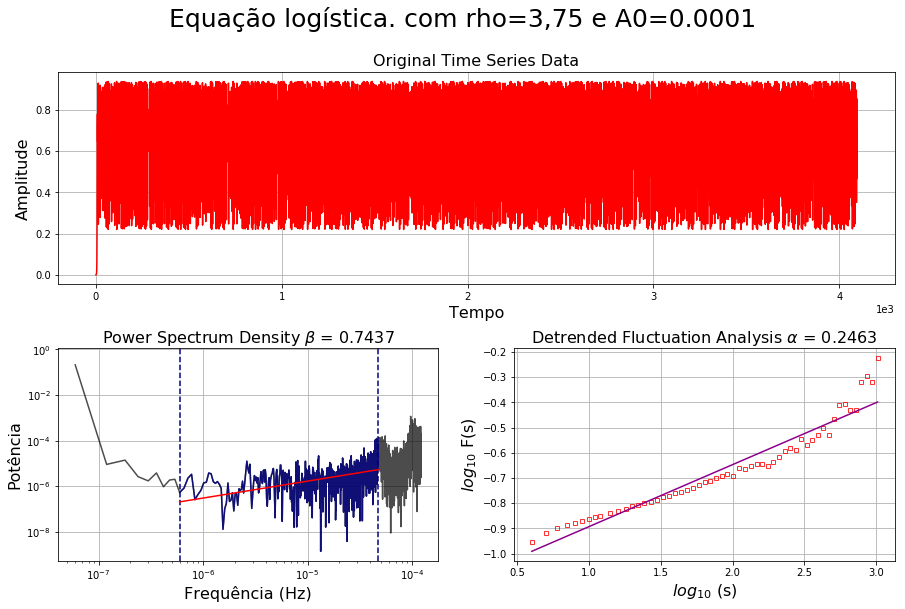

In [11]:
aux.plot_psd_dfa(A, 'Equação logística. com rho=3,75 e A0=0.0001')

<a id='first'></a>
## <center>Analise dos primeiros 1024 pontos</center>
* [Cálculo dos momentos estatísticos](#calcstatsfirst)
* [Distribuição Normal fitada](#fitnormdistfirst)
* [Distribuição Lognormal fitada](#fitlognormdistfirst)
* [Plot do espaço de Cullen-Frey](#cullenfreyfirst)
* [Fitting da melhor distribuição segundo método de Cullen-Frey](#fitbestdistfirst)
* [Plot da função de autocorrelação](#autocorrefirst)
* [Plot do PSD e DFS](#psddfafirst)

In [12]:
A = save_A[1024:]
name = "A.ex:1.1.a"
savetxt(name + ".txt", A)

<a id='calcstatsfirst'></a>
### <center>Calculando os momentos do ensemble</center>

In [13]:
A_mean, A_var, A_skew, A_kurtosis = aux.calcMoments(A)

print("mean : ", A_mean)
print("var  : ", A_var)
print("skew : ", A_skew)
print("kurt : ", A_kurtosis)

A_Q1 = scoreatpercentile(A, 25)
A_Q3 = scoreatpercentile(A, 75)

print("Q1   : ", A_Q1)
print("Q3   : ", A_Q3)

mean :  0.651618001356
var  :  0.0531894154818
skew :  -0.533838805535
kurt :  -0.98857228267
Q1   :  0.465820822002
Q3   :  0.854554556541


<a id='fitnormdistfist'></a>
### <center>Fitando uma distribuição normal</center>

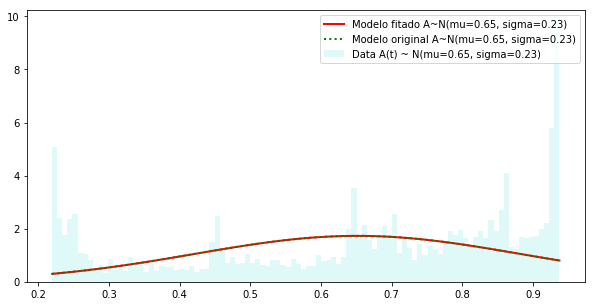

In [14]:
aux.fitting_normal_distribution(A)

<a id='fitlognormdistfirst'></a>
### <center>Fitando uma distribuição lognormal</center>

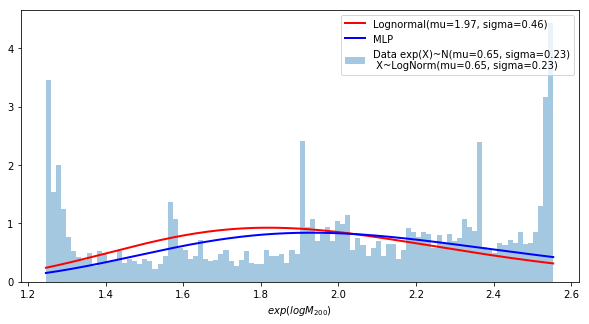

In [15]:
aux.fitting_lognormal_and_mlp_distribution(A)

### Fitando uma distribuição lognormal (utlizando minha implementação)

parametros de fitting:  (0.0037565315894072526, -60.778435421663545, 61.429250192598147)
        Fitado			 Original
mean :  0.6512482028043536 	 0.651618001356
var  :  0.05325172885764862 	 0.0531894154818
skew :  0.011269687537115226 	 -0.5338388055354238
kurt :  0.0002257890534940188 	 -0.9885722826698675


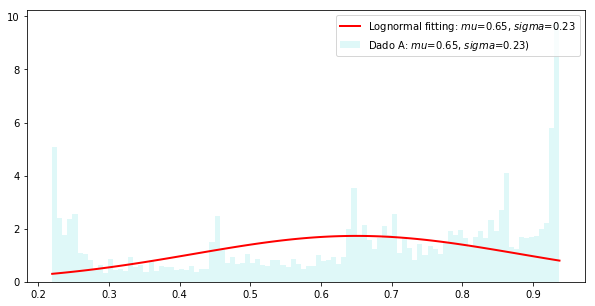

In [16]:
aux.fitting_lognormal_distribution(A)

<a id='cullenfreyfirst'></a>
### <center>Plotando dados no espaço de Cullen-Frey</center>

summary statistics
------
min:  0.2197266   max:  0.9375 
median:  0.6966111 
mean:  0.651618 
estimated sd:  0.2306659 
estimated skewness:  -0.5340996 
estimated kurtosis:  2.011772 



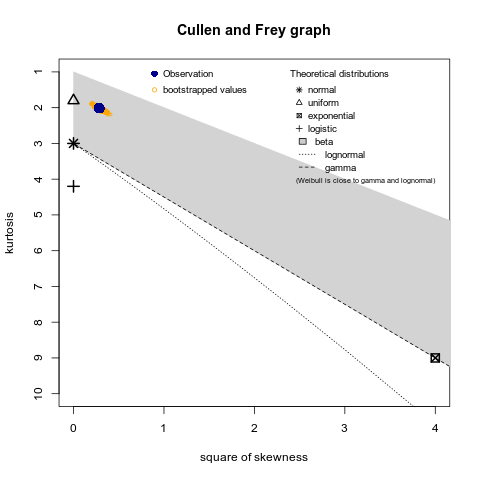

In [17]:
command = 'Rscript'
path_script = 'cullen_frey_script.R'

# define arguments
args = [name,]

# build subprocess command
cmd = [command, path_script] + args

x = subprocess.check_output(cmd, universal_newlines=True)
print(x)


Image(name+".png")

<a id='fitbestdistfirst'></a>
### <center>Fitando melhor distribuição segundo método de Cullen-Frey</center>

parametros de fitting:  (0.69159454277228771, 0.51069396728316085, 0.21962658171245464, 0.71797341243232105)
        Fitado			 Original
mean :  0.6326276956222016 	 0.651618001356
var  :  0.057192279043524474 	 0.0531894154818
skew :  -0.2821242716214038 	 -0.5338388055354238
kurt :  -1.3368132760120015 	 -0.9885722826698675


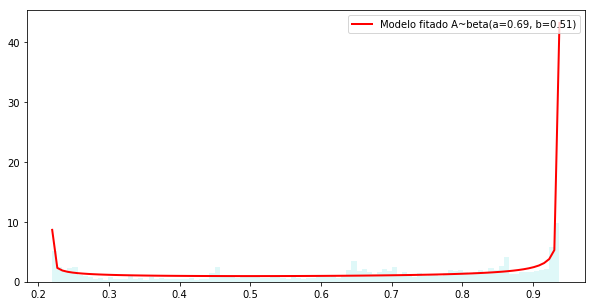

In [18]:
aux.fitting_beta_distribution(A)

<a id='autocorrefirst'></a>
### <center>Calculando autocorrelação</center>

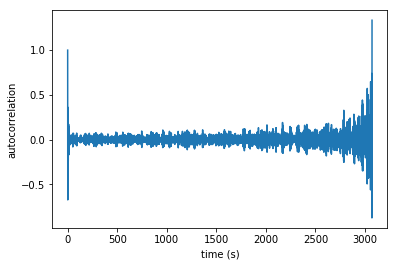

In [19]:
aux.plot_estimated_autocorrelation(t, A, 0, len(A))

<a id='psddfafirst'></a>
### <center>Plotando DFA e PSD</center>

Original time series data (3072 points): 

First 10 points: [ 0.26786644  0.73542754  0.72965202  0.73972482  0.72199505  0.75269325
  0.69804796  0.79041377  0.62122441  0.88239241]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


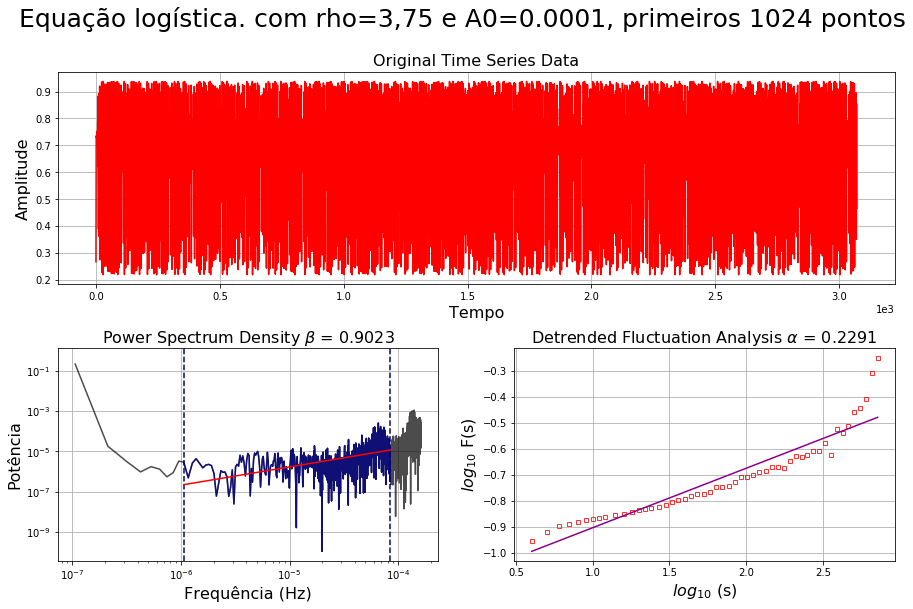

In [20]:
aux.plot_psd_dfa(A, 'Equação logística. com rho=3,75 e A0=0.0001, primeiros 1024 pontos')

<a id='last'></a>
## <center>Analise dos últimos 1024 pontos</center>
* [Cálculo dos momentos estatísticos](#calcstatslast)
* [Distribuição Normal fitada](#fitnormdistlast)
* [Distribuição Lognormal fitada](#fitlognormdistlast)
* [Plot do espaço de Cullen-Frey](#cullenfreylast)
* [Fitting da melhor distribuição segundo método de Cullen-Frey](#fitbestdistlast)
* [Plot da função de autocorrelação](#autocorrelast)
* [Plot do PSD e DFS](#psddfalast)

In [21]:
A = save_A[3*1024:4096]
name = "A.ex:1.1.a"
savetxt(name + ".txt", A)

In [22]:
A.shape

(1024,)

<a id='calcstatslast'></a>
### <center>Calculando os momentos do ensemble</center>

In [23]:
A_mean, A_var, A_skew, A_kurtosis = aux.calcMoments(A)

print("mean : ", A_mean)
print("var  : ", A_var)
print("skew : ", A_skew)
print("kurt : ", A_kurtosis)

A_Q1 = scoreatpercentile(A, 25)
A_Q3 = scoreatpercentile(A, 75)

print("Q1   : ", A_Q1)
print("Q3   : ", A_Q3)

mean :  0.652503057542
var  :  0.0526056118148
skew :  -0.534201036962
kurt :  -0.99536747191
Q1   :  0.457517180012
Q3   :  0.857698366349


<a id='fitnormdistlast'></a>
### <center>Fitando uma distribuição normal</center>

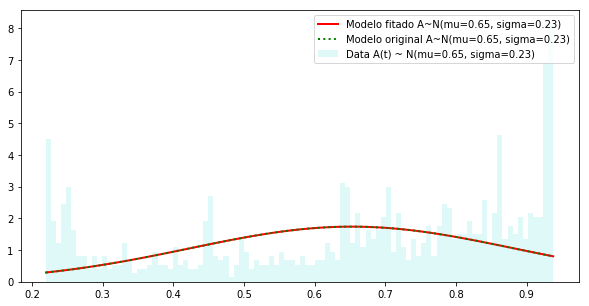

In [24]:
aux.fitting_normal_distribution(A)

<a id='fitlognormdistlast'></a>
### <center>Fitando uma distribuição lognormal</center>

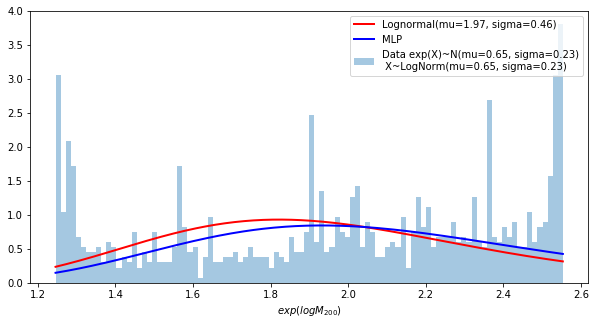

In [25]:
aux.fitting_lognormal_and_mlp_distribution(A)

### Fitando uma distribuição lognormal (utlizando minha implementação)

parametros de fitting:  (0.0029028469031551069, -78.587345644237729, 79.239098880198924)
        Fitado			 Original
mean :  0.6520870915959165 	 0.652503057542
var  :  0.052909396603846255 	 0.0526056118148
skew :  0.00870858351621843 	 -0.5342010369622291
kurt :  0.00013482595544900278 	 -0.9953674719103756


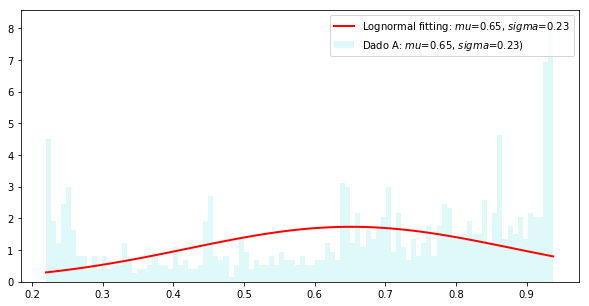

In [26]:
aux.fitting_lognormal_distribution(A)

<a id='cullenfreylast'></a>
### <center>Plotando dados no espaço de Cullen-Frey</center>

summary statistics
------
min:  0.2197266   max:  0.9375 
median:  0.700494 
mean:  0.6525031 
estimated sd:  0.2294712 
estimated skewness:  -0.534985 
estimated kurtosis:  2.005638 



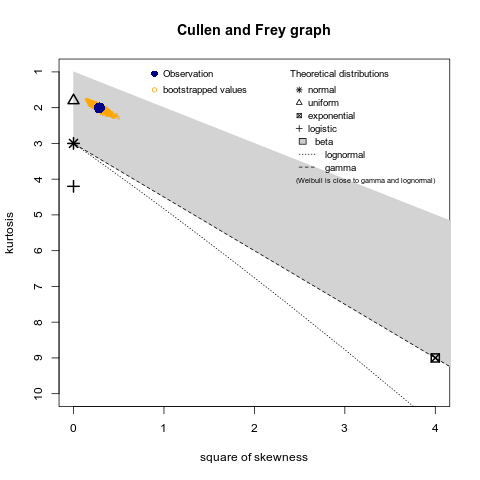

In [27]:
command = 'Rscript'
path_script = 'cullen_frey_script.R'

# define arguments
args = [name,]

# build subprocess command
cmd = [command, path_script] + args

x = subprocess.check_output(cmd, universal_newlines=True)
print(x)


Image(name+".png")

<a id='fitbestdistlast'></a>
### <center>Fitando melhor distribuição segundo método de Cullen-Frey</center>

parametros de fitting:  (0.7075383942827802, 0.52017595579851184, 0.21962658171245464, 0.71797341243232105)
        Fitado			 Original
mean :  0.6333985273905811 	 0.652503057542
var  :  0.05650187277037103 	 0.0526056118148
skew :  -0.2856255417079101 	 -0.5342010369622291
kurt :  -1.325779059183752 	 -0.9953674719103756


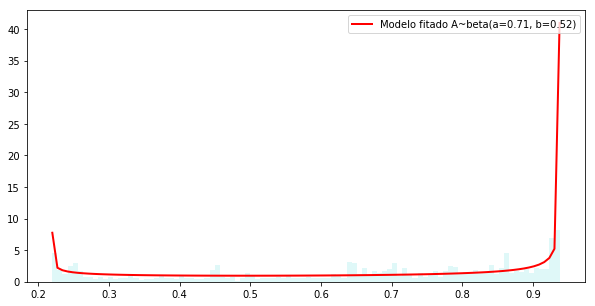

In [28]:
aux.fitting_beta_distribution(A)

<a id='autocorrelast'></a>
### <center>Calculando autocorrelação</center>

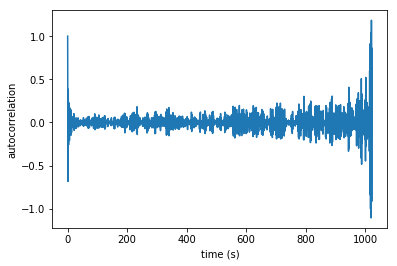

In [29]:
aux.plot_estimated_autocorrelation(t, A, 0, len(A))

<a id='psddfalast'></a>
### <center>Plotando DFA e PSD</center>

Original time series data (1024 points): 

First 10 points: [ 0.40959003  0.90684764  0.31678125  0.81161583  0.5733584   0.91731955
  0.28441649  0.76321406  0.67769384  0.81909337]


1. Plotting time series data...
2. Plotting Power Spectrum Density...
3. Plotting Detrended Fluctuation Analysis...


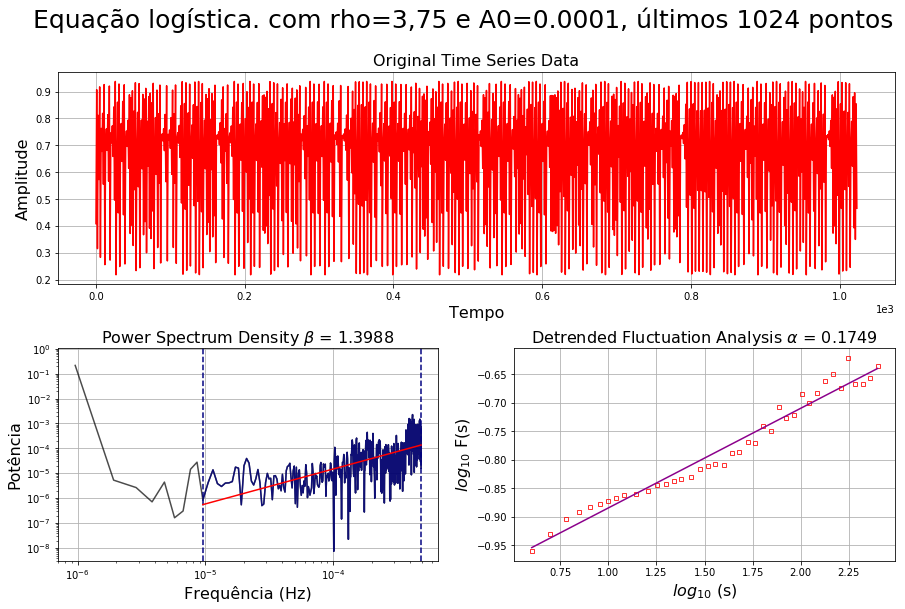

In [30]:
aux.plot_psd_dfa(A, 'Equação logística. com rho=3,75 e A0=0.0001, últimos 1024 pontos')